<a href="https://colab.research.google.com/github/bjentwistle/PythonFundamentals/blob/main/Worksheets/10_1_SQL_databases_worksheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using SQL to query relational database 
---
A relational database is essentially a set of data tables that are all related to one another.   

For example, if you worked at a online retail store, you may have a relational database which contained various tables that altogether made up all your sales data. This could be a customers table, a products table and an employee sales table. As they all work in conjunction with one another to build a bigger picture - these tables make up a relational database. 

### Star Schema
---

A star schema is a type of relational database schema that is composed of a single, central 'fact' table that is surrounded by other relational 'dimension' tables.

![Star schema](https://assets.website-files.com/5e6f9b297ef3941db2593ba1/614df58a1f10f92b88f95709_Screenshot%202021-09-24%20at%2017.46.51.png)

From the central 'fact' table, all relevant information can be pulled together to create specific report tables for analysis.  

For example, a report could be generated by selecting all entries in the fact_sales table and, for each, pulling together:

customer_address_country, store_country and purchase_month, purchase_amount  

through the relevant ids.  

From there is would be possible to analyse the volume of sales within the same country, by country, by month and from country to country, etc.  SQL is a useful tool in this scenario, used either to interrogate the database directly, or to create data tables (e.g. pandas dataframes) from a combination of database tables.


# Querying in SQL 
---

SQL stands for Structured Query Language. Whilst we will not cover it in its entirety in this course, [sqlcourse.com](https://www.sqlcourse.com) and [sqlcourse2.com](https://www.sqlcourse2.com) provides free tutorials on some basic queries in SQL. 

### Select in SQL 
---

A useful and basic query in SQL is the SELECT function. It works by selecting important data items from either a single table or multiple relational tables. 

The format is as follows:

* single column 
`SELECT column1 FROM table WHERE condition `

* multiple columns 
`SELECT column1, column2 FROM table WHERE condition`

* all columns 
`SELECT * FROM table WHERE condition`

see for more info: [select](https://www.sqlcourse.com/select.html)

### Joining data from multiple tables
---

If working with relational databases you can use SELECT by joining the databases using the WHERE part of the statement to join by common columns.

For example:
If you had 2 relational tables which both had an a column in common:

`SELECT table1.column1, table1.column2, table2.column1, table2.column2 FROM table1, table2 WHERE table1.column1 = table2.column1` 

For more info see [Table Joins](https://www.sqlcourse2.com/joins.html)


# Conditional statements
---
Conditional selections used in the where clause:

* `=`	Equal  
* `>`	Greater than  
* `<`	Less than  
* `>=` Greater than or equal  
* `<=` Less than or equal  
* `<>`	Not equal to  
* `LIKE` `%` is like 

**LIKE**
This conditional statement is used to say if something is like a specified string. 

* `column1 LIKE '%string'` looks for values in column1 that has the string characters at the end
* `column1 LIKE 'string%'` looks for any values that have the string characters at the beginning 
* `column1 LIKE '%string%'` looks for any values that have the string characters anywhere 

### Using Boolean operators with multiple conditions
---
Much like python you can use boolean operators (AND, OR) to have multiple WHERE conditions.
* select data when both conditions are true
`SELECT column FROM table WHERE condition1 AND condition2`
* select data when either or conditions are true
`SELECT column FROM table WHERE condition1 OR condition2`  

For more info: [multiple where conditions](https://www.sqlcourse2.com/boolean.html)

# Using SQL in Python 
---

There are a number of varieties of SQL (Oracle SQL, mySQL, postgreSQL, etc).  Each has slight differences in the language it uses to interrogate databases in it particular format.  

For this worksheet we will be using a mysql database and so will be using the mySQL variety of SQL.

### Install the SQL library mysql.connector
---


Each time you have downloaded this worksheet you will need to re-install the library to allow you to use the mysql.connector library, which will connect to the database and run the queries.  

RUN THE CODE IN THE CELL BELOW TO INSTALL mysql.connector

In [2]:
# colab does not have mysql automatically installed, so you must run this code once to install it each time you reopen the colab document
!pip install mysql.connector

     |████████████████████████████████| 11.9 MB 5.0 MB/s 
  Created wheel for mysql.connector: filename=mysql_connector-2.2.9-cp37-cp37m-linux_x86_64.whl size=247965 sha256=70105feeb4c1adeb62de6b37d23224df39b81341c8ac9e35ceeafe7e43703ce4
  Stored in directory: /root/.cache/pip/wheels/42/2f/c3/692fc7fc1f0d8c06b9175d94f0fc30f4f92348f5df5af1b8b7
Successfully built mysql.connector


Each time you write new code to use the functions of the mysql.connector library, you need to add an import at the top of the code cell

`import mysql.connector`


### To retrieve a database from host 
---

Use the following with the details of the database you want to retrieve: 
```
mydb = mysql.connector.connect(
    host= "",
    port="",
    user="",
    password="",
    database="",
    )
```

To query your database, this function will run and return the query result, dealing with any errors so that they don't crash the code:

```
def execute_query(query):
  mycursor = mydb.cursor()
  mycursor.execute(query)
  try:
    records = mycursor.fetchall()
    return records
  except(e):
    print("An error occurred" + str(e))
    return None
```
to run the function

```execute_query("....")```

eg. 

``` execute_query("SELECT * FROM table")```

### Get started with the Sales Database 
---

Let's start by looking at a database of sales information.  

![image.png](https://relational.fit.cvut.cz/assets/img/datasets-generated/SalesDB.svg)  

Use the code cell below to run a first SQL query on this database, to show the tables it holds.  Executing the SQL query "SHOW TABLES" will do this, e.g.:  
` execute_query("SHOW TABLES")`  

Finish the code in the cell below to show the tables. For help, refer to the demonstration videos.



In [3]:
import mysql.connector

mydb = mysql.connector.connect(
  host="relational.fit.cvut.cz",
  port="3306",
  user ="guest",
  password ="relational",
  database="SalesDB"
)

def execute_query(query):
  mycursor = mydb.cursor()
  mycursor.execute(query)
  try:
    records = mycursor.fetchall()
    return records
  except:
    print("An error occurred: ")
    return None

# add your code here to run the SHOW TABLES query with execute_query and print the result
records = execute_query("SHOW TABLES")
print(records)

[('Customers',), ('Employees',), ('Products',), ('Sales',)]


### Exercise 1
---

This query will return the number of row in a table given the table name

`"SELECT COUNT(*) FROM <<table>>"`

* Run a query to get a count of rows in the Sales table.
* Run a query to get a count of rows in the Employees table
* Challenging:
*  *  Write a for loop that will loop through the tables (from the SHOW TABLES query) and will get a count of the rows for each table.  (_Hint:  you can create a query from "SELECT COUNT(*) FROM " + table, this [video](https://www.youtube.com/watch?v=WqW6p8smJAQ) demonstrates how you would do this_)

In [4]:
records = execute_query("SHOW TABLES")
#sales_rows = execute_query("SELECT COUNT(*) FROM Sales")
#employees_rows = execute_query("SELECT COUNT(*) FROM Employees")

for record in records:
  query = ("SELECT COUNT(*) FROM " + record[0])
  results = execute_query(query)
  print(record, "= ", results)




('Customers',) =  [(19759,)]
('Employees',) =  [(23,)]
('Products',) =  [(504,)]
('Sales',) =  [(6715221,)]


### Exercise 2
---

This query will return the first 10 rows in the Customer table  
`"SELECT * FROM Customer LIMIT 10"`

* Run a query to get the first 10 rows in the Customer table
* Run a query to show the first 20 rows in the Products table



In [5]:
import mysql.connector

mydb = mysql.connector.connect(
  host="relational.fit.cvut.cz",
  port="3306",
  user ="guest",
  password ="relational",
  database="SalesDB"
)

first20_rows = execute_query("SELECT * FROM Customers LIMIT 20")
print(first20_rows)

[(1, 'Aaron', None, 'Alexander'), (2, 'Aaron', None, 'Bryant'), (3, 'Aaron', None, 'Butler'), (4, 'Aaron', None, 'Chen'), (5, 'Aaron', None, 'Coleman'), (6, 'Aaron', None, 'Con'), (7, 'Aaron', None, 'Edwards'), (8, 'Aaron', None, 'Flores'), (9, 'Aaron', None, 'Foster'), (10, 'Aaron', None, 'Gonzales'), (11, 'Aaron', None, 'Griffin'), (12, 'Aaron', None, 'Henderson'), (13, 'Aaron', None, 'Hernandez'), (14, 'Aaron', None, 'Hill'), (15, 'Aaron', None, 'Jai'), (16, 'Aaron', None, 'Jenkins'), (17, 'Aaron', None, 'Lal'), (18, 'Aaron', None, 'Li'), (19, 'Aaron', None, 'Nicholls'), (20, 'Aaron', None, 'Perry')]


Exercise 3
---

You can use:  
`"DESCRIBE <<table>>"`

to show the column/field information for a given table

* run a query to show the fields in the Employees table
* run a query to show the fields in the Products table



In [6]:
employees_fields = execute_query("DESCRIBE Employees")
print(employees_fields)

products_fields = execute_query("DESCRIBE Products")
print(products_fields)

[('EmployeeID', 'int(11)', 'NO', 'PRI', None, ''), ('FirstName', 'varchar(40)', 'NO', '', None, ''), ('MiddleInitial', 'varchar(40)', 'YES', '', None, ''), ('LastName', 'varchar(40)', 'NO', '', None, '')]
[('ProductID', 'int(11)', 'NO', 'PRI', None, ''), ('Name', 'varchar(50)', 'NO', '', None, ''), ('Price', 'decimal(19,4)', 'YES', '', None, '')]


Continue with Inside Movie Database (IMDb)
---

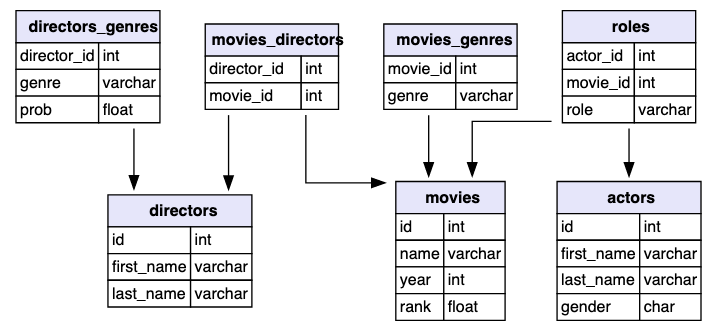

### Exercise 4 - reading SQL database into python
---
Load in the IMDB database and run the execute_query() function. The location of the database is as follows:
```
  host="relational.fit.cvut.cz",
  port="3306",
  user ="guest",
  password ="relational",
  database="imdb_ijs"
  ```
* show the tables in the database
* print the number of records in each of the tables


(_**Hint**:  use a loop to loop through the tables and, for each, print the number of records_)  




In [7]:
import mysql.connector

# add the database configuration code from above here
mydb = mysql.connector.connect(
  host="relational.fit.cvut.cz",
  port="3306",
  user ="guest",
  password ="relational",
  database="imdb_ijs"    
)

# add a function below here to execute a query (see above for code)
def execute_query(query):
  mycursor = mydb.cursor()
  mycursor.execute(query)
  try:
    records = mycursor.fetchall()
    return records
  except:
    print("An error occurred: ")
    return None


# run a query using the execute query function
records = execute_query("SHOW TABLES")

for record in records:
  query = ("SELECT COUNT(*) FROM " + record[0])
  results = execute_query(query)
  print(record, "= ", results)

('actors',) =  [(817718,)]
('directors',) =  [(86880,)]
('directors_genres',) =  [(156562,)]
('movies',) =  [(388269,)]
('movies_directors',) =  [(371180,)]
('movies_genres',) =  [(395119,)]
('roles',) =  [(3431966,)]


### Exercise 5 - selecting all columns from a table
---
Using the `execute_query()` function, select all columns from the table `movies`, limit it to the first 5 rows of the table only.

The execute_query function will always need the query to be included in the brackets 

**Expected output**
first 5 lines should be:  
```
(0, '#28', 2002, None),  
 (1, '#7 Train: An Immigrant Journey, The', 2000, None),  
 (2, '$', 1971, 6.4),  
 (3, '$1,000 Reward', 1913, None),  
 (4, '$1,000 Reward', 1915, None),     
 (5, '$1,000 Reward', 1923, None),    
 ```


In [8]:
def get_movies():
  # using the execute_query() function you ran earlier and a select statement, return the first 5 movies
  first5_movies = execute_query("SELECT * FROM movies LIMIT 5")
  print(first5_movies)
  return first5_movies

# this code will run and test if the length of the array returned from your function is correct
actual = len(get_movies())
expected = 5

if actual == expected:
  print("Test passed", actual)
else:
  print("Test failed, expected", expected, "got", actual)

# this code will show the first five rows of data
get_movies()

[(0, '#28', 2002, None), (1, '#7 Train: An Immigrant Journey, The', 2000, None), (2, '$', 1971, 6.4), (3, '$1,000 Reward', 1913, None), (4, '$1,000 Reward', 1915, None)]
Test passed 5
[(0, '#28', 2002, None), (1, '#7 Train: An Immigrant Journey, The', 2000, None), (2, '$', 1971, 6.4), (3, '$1,000 Reward', 1913, None), (4, '$1,000 Reward', 1915, None)]


[(0, '#28', 2002, None),
 (1, '#7 Train: An Immigrant Journey, The', 2000, None),
 (2, '$', 1971, 6.4),
 (3, '$1,000 Reward', 1913, None),
 (4, '$1,000 Reward', 1915, None)]

### Exercise 6 - selecting movies made after 2007
---

Select the name and year columns from movies where the movie was made after 2007. 

```
SELECT field list FROM table name WHERE condition
```

**Expected Output**  
[('Harry Potter and the Half-Blood Prince', 2008)]

In [9]:
def get_new_movies():
  query = "SELECT name FROM movies WHERE year > 2007"
  movies_after2007 = execute_query(query)
  return movies_after2007

# This code will run and test if length of returned array is same as expected
actual = len(get_new_movies())
expected = 1

if actual == expected:
  print("Test passed", actual)
else:
  print("Test failed, expected", expected, "got", actual)

# This code will run the function and show the output
get_new_movies()

Test passed 1


[('Harry Potter and the Half-Blood Prince',)]

### Exercise 7 - selecting on two criteria
---

Select the name of all movies in 2000 that were ranked above 9.  Print the names one per line, then the number of films.

(_Hint: SQL only requires = for comparison rather than == as used in python_)

**Expected output**:
There are 45 records

In [10]:
query = "SELECT name FROM movies WHERE year = 2000 AND rank > 9"
movies_above9 = execute_query(query)
print(movies_above9)
print(len(movies_above9))

[('36K',), ('Amazones 2000',), ('Amor',), ('Anno Domini',), ('As I Was Moving Ahead Occasionally I Saw Brief Glimpses of Beauty',), ('Auslandstournee',), ('Cartas da Me',), ('Christmas Tree and a Wedding, A',), ('Clockwork Maury, A',), ('David Nelson Live',), ("Don't Kill",), ('Dr. Babasaheb Ambedkar',), ('Era outra vez',), ('Etat',), ('Funeral de los dedos, El',), ('Funky Town',), ('Game Day',), ('Holocaust szemei, A',), ('Innocents Mission, The',), ('Johnny the Amazing Firetruck',), ("Judy's Time",), ('Kairee',), ('Kehrwoche',), ('Laatste Joegoslavische elftal, Het',), ('Latitude Zero',), ("Man On Lincoln's Nose, The",), ('Markova: Comfort Gay',), ('Moving Illustrations of Machines',), ('Mnchen - Geheimnisse einer Stadt',), ('Our House: A Very Real Documentary About Kids of Gay & Lesbian Parents',), ('Pantalones',), ('Plus rien...',), ('Prison Life',), ('Puzzle, The',), ('Reshimat Ahava',), ('Rhapsody in Blue',), ('Robbers',), ('Sevda heit Liebe',), ('Stagestruck: Gay Theatre in the 

### Exercise 8 - linking data from two tables to find all comedy films 
---
Select the `name` of all comedies using the movies and movies_genres tables, joining by the id column in the movies table and the movie_id column in the movies_genres table.

To construct the SQL query:
*  SELECT both tables (movies, movies_genres)
*  add the condition WHERE the id in movies (movies.id) is the same as the movie_id in movies_genres (movies_genres.movie_id)
*  AND the second condition movies_genres.genre = 'comedy'

```
SELECT table1, table2 WHERE table1.column = table2.column1 AND table2.column2 = value
```

**Expected output**  
`[('$',),
 ('$1,000,000 Duck',),
 ('$10,000 Under a Pillow',),
 ('$1000 a Touchdown',),
 ('$30',)]`




In [11]:
def get_comedies():
  query= ("SELECT name FROM movies, movies_genres WHERE movies.id = movies_genres.movie_id AND movies_genres.genre = 'comedy'")
  comedies = execute_query(query)
  print(comedies)
  return comedies


# This code will run and test if length of returned array is same as expected
actual = len(get_comedies())
expected = 56425

if actual == expected:
  print("Test passed", actual)
else:
  print("Test failed, expected", expected, "got", actual)


# This code will run the function and show the first five rows
get_comedies()[0:5]

[('$',), ('$1,000,000 Duck',), ('$10,000 Under a Pillow',), ('$1000 a Touchdown',), ('$30',), ('$40,000',), ('$5.15/Hr.',), ('$500 Reward, The',), ('$500,000 Reward',), ("''Bear'' Facts, The",), ("'88 Dodge Aries",), ("'?' Motorist, The",), ("'A' gai waak",), ("'A' gai waak juk jaap",), ("'Arry and 'Arriet's Evening Out",), ("'burbs, The",), ("'C' Word, The",), ("'Cat and Mouse' at the Home",), ("'Crocodile' Dundee II",), ("'E'",), ("'Foxy Grandpa' Shows Boys He Is a Magician",), ("'High Sign', The",), ("'Hyp-Nut-Tist', The",), ("'Imp'probable Mr. Wee Gee, The",), ("'Java Madness' formerly titled 'Coffee Madness'",), ("'J to tedy beru, sfe...!'",), ("'M' Word",), ("'Moving' Picture, A",), ("'n donderend gepiep",), ("'Ne gnstige Gelegenheit",), ("'Neath Brooklyn Bridge",), ("'O re",), ("'Panaderos', Los",), ("'Simple Life' Cure, The",), ("'t Is wreed in de wereld",), ("'t Was een April",), ("'Taint Legal",), ("'Til There Was You",), ("'Tis Mother!",), ("'Tis Spring",), ("'Tis the Ball",

[('$',),
 ('$1,000,000 Duck',),
 ('$10,000 Under a Pillow',),
 ('$1000 a Touchdown',),
 ('$30',)]

### Exercise 9 - search for Quentin Tarantino films (linking 3 tables)
---
Select the names of movies directed by Quentin Tarantino.

*Hint* You will need to join by id using the movies, movies_directors and directors tables  

* SELECT name
* FROM the three tables
* WHERE the directors id matches
* AND the movies id and movies_directors id match
* AND the director's first name is Quentin and last name is Tarantino

**Expected output**  

`[('Carga mortal',),
 ('"Conquest"',),
 ('Courting Courtney',),
 ('Four Rooms',),
 ('Inglorious Bastards',)]`

In [18]:
def get_tarantino():
  query = ("SELECT movies.name FROM movies, movies_directors, directors WHERE movies.id = movies_directors.movie_id AND directors.id = movies_directors.director_id AND directors.first_name = 'Quentin' AND directors.last_name = 'Tarantino'")
  # AND directors.first_name = 'Quentin' AND directors.last_name = 'Tarantino'
  tarantino_movies = execute_query(query)

  return tarantino_movies

tarantino_movies = get_tarantino()
print(tarantino_movies)

# This code will run and test if length of returned array is same as expected
actual = len(get_tarantino())
expected = 10

if actual == expected:
  print("Test passed", actual)
else:
  print("Test failed, expected", expected, "got", actual)

# This code will run the function and show the first five rows
get_tarantino()



[('Four Rooms',), ('Inglorious Bastards',), ('Jackie Brown',), ('Kill Bill: Vol. 1',), ('Kill Bill: Vol. 2',), ("My Best Friend's Birthday",), ('Pulp Fiction',), ('Reservoir Dogs',), ('"ER"',), ('"Jimmy Kimmel Live"',)]
Test passed 10


[('Four Rooms',),
 ('Inglorious Bastards',),
 ('Jackie Brown',),
 ('Kill Bill: Vol. 1',),
 ('Kill Bill: Vol. 2',),
 ("My Best Friend's Birthday",),
 ('Pulp Fiction',),
 ('Reservoir Dogs',),
 ('"ER"',),
 ('"Jimmy Kimmel Live"',)]

# Read an SQL query into a pandas dataframe 
---

SQL is a powerful tool for reading data from across tables in a relational database into one table that can be analysed with statistical tools designed to operate on single data tables, such as pandas dataframes.  

To read an SQL query into a pandas dataframe we can replace execute_query with pd.read_sql_query(), giving it the query and the database

`df = pd.read_sql_query(query, database)`


For example:
```
query = "SELECT * FROM movies"
df = pd.read_sql_query(query, mydb)
```


### Exercise 10 - creating a movies dataframe 
---

Pandas provide a function that will execute a query on a connected database and format the result into a dataframe

The query:
```
SELECT first_name, last_name, name, year, rank, genre FROM directors, movies, movies_genres, movies_directors WHERE movies.id = movies_directors.movie_id AND movies.id = movies_genres.movie_id AND directors.id = movies_directors.director_id
```
will:

*  SELECT the fields first_name FROM directors
*  SELECT the fields name, year, rank FROM movies
*  SELECT the field genre FROM movies_genres
*  WHERE the ids match in movies and movies_directors
*  AND the ids matchin movies and movies_genres
*  AND the ids match in directors and movies directors

Add the query to the code below, which will then create a dataframe from the output.  Use the `pd.read_sql_query` function to read this query into a pandas dataframe called **movies_df**

In [ ]:
import pandas as pd
from google.colab import files

def get_movies_data():
  query = "SELECT first_name, last_name, name, year, rank, genre FROM directors, movies, movies_genres, movies_directors WHERE movies.id = movies_directors.movie_id AND movies.id = movies_genres.movie_id AND directors.id = movies_directors.director_id"
  df = pd.read_sql_query(query, mydb)
  df. to_csv('movies.csv')
  files.download('movies.csv')
  return df

# This code will test if your movies_df variable is a valid pandas dataframe 
movies_df = get_movies_data()
if isinstance(movies_df,pd.DataFrame):
  print("Test passed, variable is a pandas dataframe")
else:
  print("Test failed, not a pandas dataframe")

# This will show the first part of the dataframe
movies_df.head()

# Reflection
----

## What skills have you demonstrated in completing this notebook?

Your answer:

## What caused you the most difficulty?

Your answer: